# (Ford GoBike System Data)
## by (Turki Bin Mohaya)

## Preliminary Wrangling

> This document explores a Bay Wheels's trip data set with more than 14 variables and 450k observations.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import date
from datetime import time
from datetime import datetime

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv('2017-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [3]:
df['start_station_id'].value_counts() # investigate stations 

15     15187
6      13664
30     12546
67     12055
58     11960
21     11334
81     10956
3      10142
22      9926
16      9347
5       7987
17      7649
50      6605
66      6414
90      6223
23      5980
48      5785
25      5732
324     5609
182     5558
44      5497
19      4842
24      4798
59      4795
28      4750
20      4656
45      4648
37      4600
323     4511
8       4269
       ...  
231      105
270       94
234       71
216       62
288       61
269       61
338       61
265       60
206       59
254       58
283       56
224       54
131       47
226       41
229       39
337       37
263       35
301       30
300       29
228       28
237       24
258       24
267       16
299       15
293       15
294       11
340        6
292        5
339        2
268        1
Name: start_station_id, Length: 272, dtype: int64

In [4]:
df['start_station_name'].value_counts()

San Francisco Ferry Building (Harry Bridges Plaza)                 15187
The Embarcadero at Sansome St                                      13664
San Francisco Caltrain (Townsend St at 4th St)                     12546
San Francisco Caltrain Station 2  (Townsend St at 4th St)          12055
Market St at 10th St                                               11960
Montgomery St BART Station (Market St at 2nd St)                   11334
Berry St at 4th St                                                 10956
Powell St BART Station (Market St at 4th St)                       10142
Howard St at Beale St                                               9926
Steuart St at Market St                                             9347
Powell St BART Station (Market St at 5th St)                        7987
Embarcadero BART Station (Beale St at Market St)                    7649
2nd St at Townsend St - Coming Soon                                 6605
3rd St at Townsend St                              

In [5]:
# an overview
print(df.shape)
print(df.info())
print(df.describe())

(519700, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB
None
        duration_sec  start_station_id  start_station_lat

### What is the structure of your dataset?

> There are 520000 observations in this data set with 15 variables. Some of them are float or integer data type, however few are stinrg objects. For example, start_station_name is a categorical variable, whereas duration is integer.

### What is/are the main feature(s) of interest in your dataset?

> I am intersted in findings which variables tend to increase duration time.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Gender, start and end station, age, and user type can really explain and support the argument.

## Univariate Exploration

> First, let us investigate Age variable after removing null values.

In [3]:
# removing missing values
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

# reseting index
df.reset_index(drop=True, inplace=True)

# create age column
df['age']= date.today().year - df['member_birth_year']

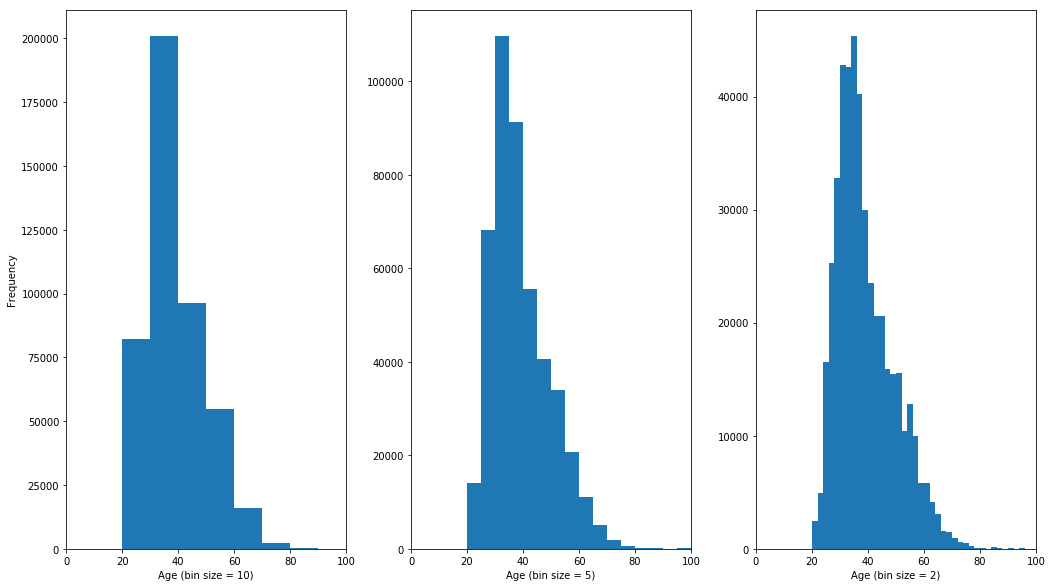

In [5]:
# exploring age with three different bin size


plt.figure(figsize=[14.70, 8.27]) # larger figure size for subplots

# histogram on left large bin size
plt.subplot(1, 3, 1) # 1 row, 3 cols, subplot 1
plt.tight_layout()
bin_edges = np.arange(0, df['age'].max()+2, 10)
plt.hist(data = df, x = 'age', bins = bin_edges);
plt.xlim([0,100]);
plt.xlabel('Age (bin size = 10)');
plt.ylabel('Frequency');

# histogram in the middle less bin size
plt.subplot(1, 3, 2) # 1 row, 3 cols, subplot 2
plt.tight_layout()
bin_edges = np.arange(0, df['age'].max()+5, 5)
plt.hist(data = df, x = 'age', bins = bin_edges);
plt.xlim([0,100]);
plt.xlabel('Age (bin size = 5)');

# histogram on right small bin size
plt.subplot(1, 3, 3) # 1 row, 3 cols, subplot 3
plt.tight_layout()
bin_edges = np.arange(0, df['age'].max()+2, 2)
plt.hist(data = df, x = 'age', bins = bin_edges);
plt.xlim([0,100]);
plt.xlabel('Age (bin size = 2)');


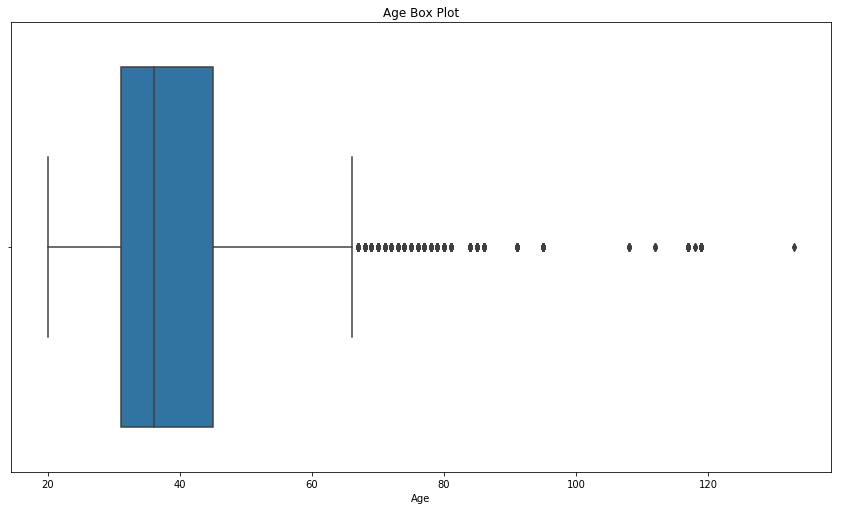

In [21]:
# Investigate age in terms of box plot

plt.figure(figsize=[14.70, 8.27])
base_color = sb.color_palette()[0]
ax1 = sb.boxplot(data = df, x = 'age', color = base_color);
plt.title('Age Box Plot');
plt.xlabel('Age');

> The age histogram is slightly skewed to the right with heavy density in the range [25,40]. This means that a large number of people in this data set are youth. Very few people are above the age of 60. The box plot shows that we have many outliers and it indicates that the mean age is below 40.

> Next let's investigate user_type variable

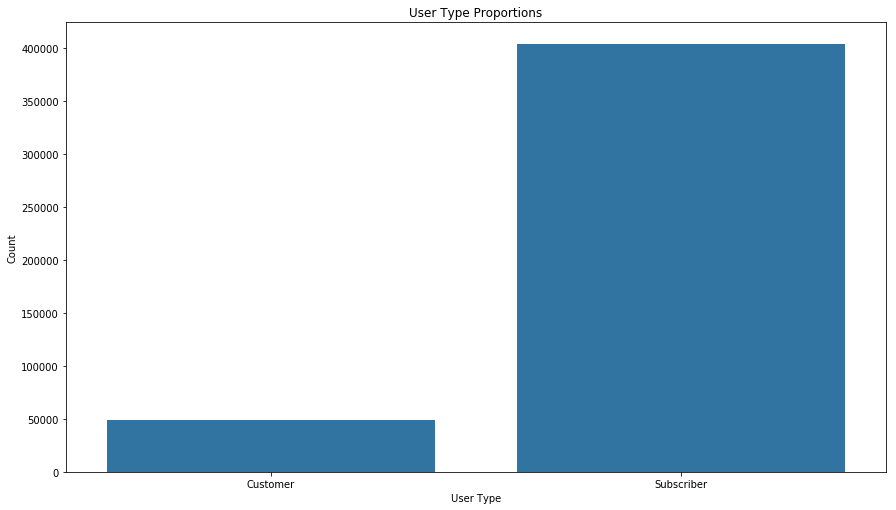

In [19]:
# user_type variable bar chart

plt.figure(figsize=[14.70, 8.27])
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'user_type', color = base_color);
plt.xlabel('User Type');
plt.ylabel('Count');
plt.title('User Type Proportions');

In [10]:
df['user_type'].value_counts()

Subscriber    404424
Customer       48735
Name: user_type, dtype: int64

> We can observe that approximately 10% only are customers, while the rest are all subscribers. Relating this to the previous finding, we can say that most people are youth and have a valid subscribtion.

> Next, the gender variable

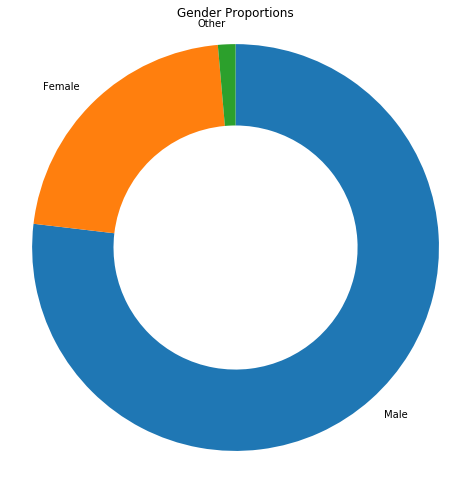

In [18]:
# gender variable pie chart

plt.figure(figsize=[14.70, 8.27])
plt.tight_layout()
sorted_counts = df['member_gender'].value_counts()
plt.pie(sorted_counts, labels=sorted_counts.index, startangle=90, counterclock=False
       , wedgeprops = {'width' : 0.4});
plt.axis('square');
plt.title('Gender Proportions');

> Interestingly, more than 75%, approximately, are males, while a small proportion did not record their gender.

> Next, let us investigate duration variable.

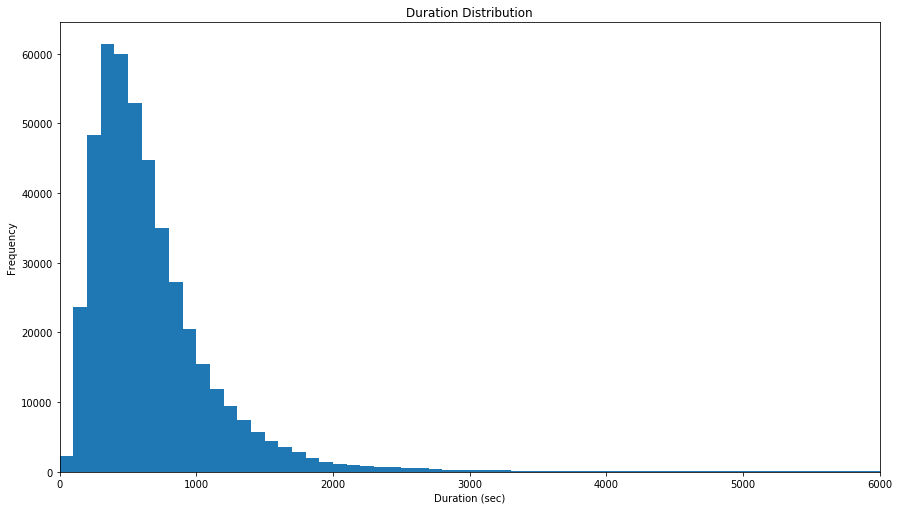

In [15]:
# exploring duration 


plt.figure(figsize=[14.70, 8.27]) # larger figure size for subplots

# histogram upper left large bin size
bin_edges = np.arange(0, df['duration_sec'].max()+100, 100)
plt.hist(data = df, x = 'duration_sec', bins = bin_edges);
plt.xlim([0,6000]);
plt.xlabel('Duration (sec)');
plt.ylabel('Frequency');
plt.title('Duration Distribution');

It appears that the distribution of duration variable is skewed to the right to large values, a transformation may present a better visualization.

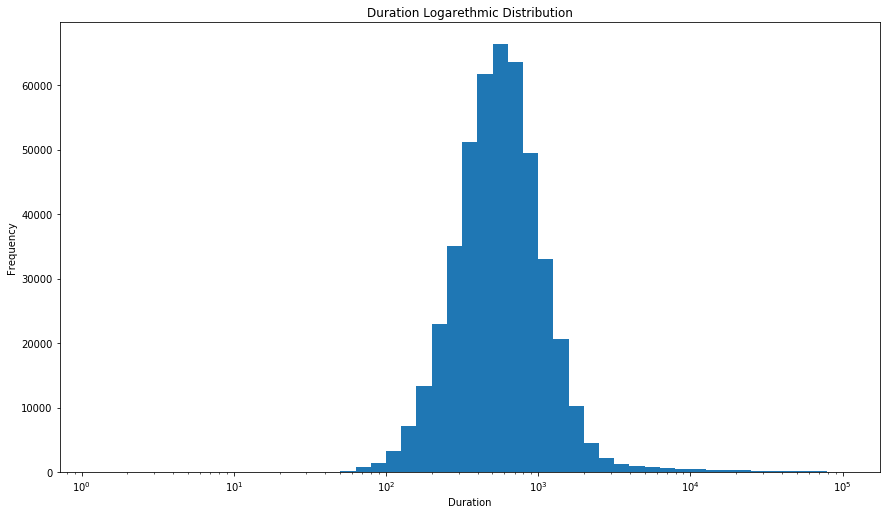

In [13]:
# transform into a logarethmic scale

log_binsize = 0.1
bins = 10 ** np.arange(0.1, np.log10(df['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[14.7, 8.27])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Duration Logarethmic Distribution')
plt.show()

> After using a logarethmic scale, the distribution of the duration variable appers to be normal, whereas it looked skewed to the right in a decimal scale.

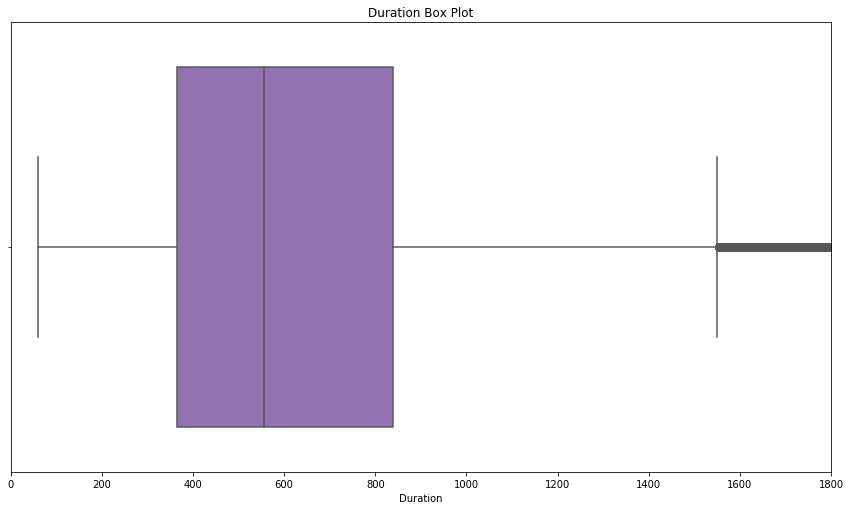

In [23]:
# duration box plot

plt.figure(figsize=[14.7,8.27])
base_color = sb.color_palette()[4]
ax1 = sb.boxplot(data = df, x = 'duration_sec', color = base_color);
plt.xlim([0,1800])
plt.title('Duration Box Plot');
plt.xlabel('Duration');

> We can notice that the duration variable has many outlires, its mean is approximately 550 seconds (or 9 mins), and its overall distribution is quitely skewed to the right.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The main variable that we aim to understand is the duration time, through the exploration above itd distribution appeared to be skewed to the right in a decimal scale with a mean value of around 550 seconds. The age variable appers also to be skewed to the right with a mean value of approximately 37. Furthermore, males in this data set represent 75%, while females are 10% only.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Both variables distributions, age and duration, look usual. However a logarethmic transformation was applied to duration as it has very large values and the result is shown as a normal distribution with the highest frequence between 100 and 1000.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in the
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

> Let us start first by explorin how gender contributes to duration time

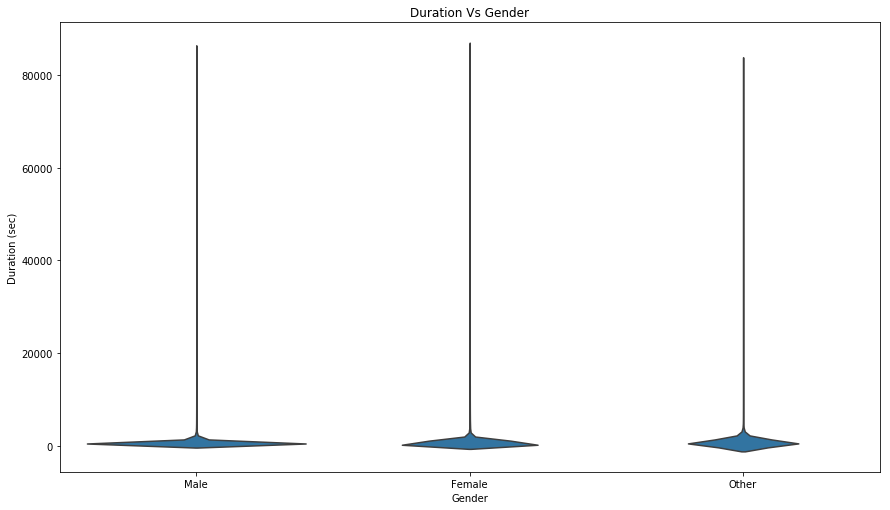

In [25]:
# violin plot for gender and duration

plt.figure(figsize=[14.7,8.27]);
base_color = sb.color_palette()[0] # main color
sb.violinplot(data = df, x = 'member_gender', y = 'duration_sec', color = base_color,
              inner = None);
plt.xlabel('Gender');
plt.ylabel('Duration (sec)');
plt.title('Duration Vs Gender');

> It shows that no gender has more contribution to increase time duration.

> Let us examine the relationship between age and duration through a sccater plot

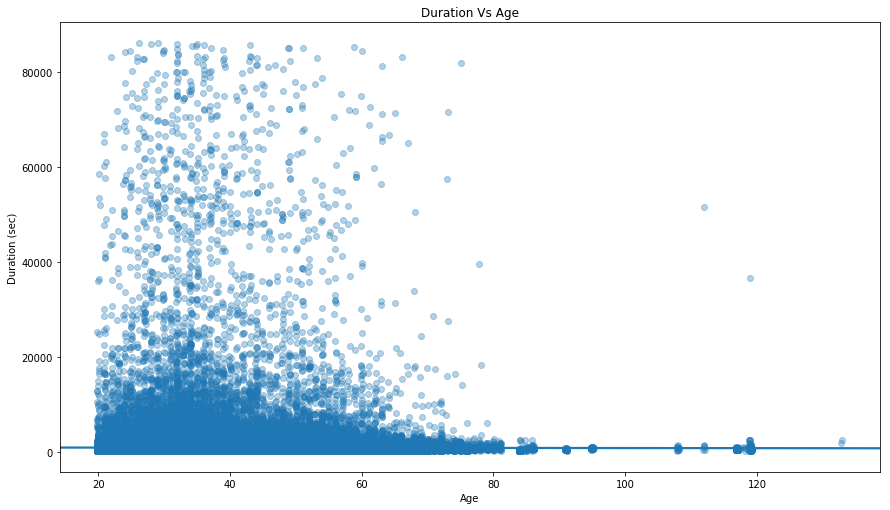

In [6]:
# a sccater plot with jitter and transparency

plt.figure(figsize=[14.7,8.27])
sb.regplot(data = df, x = 'age', y = 'duration_sec', fit_reg = True,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3});
plt.xlabel('Age');
plt.ylabel('Duration (sec)');
plt.title('Duration Vs Age');

> As shown above, duration tend to decreases as age increases.

> Let us examine if there is a relation between age and gender

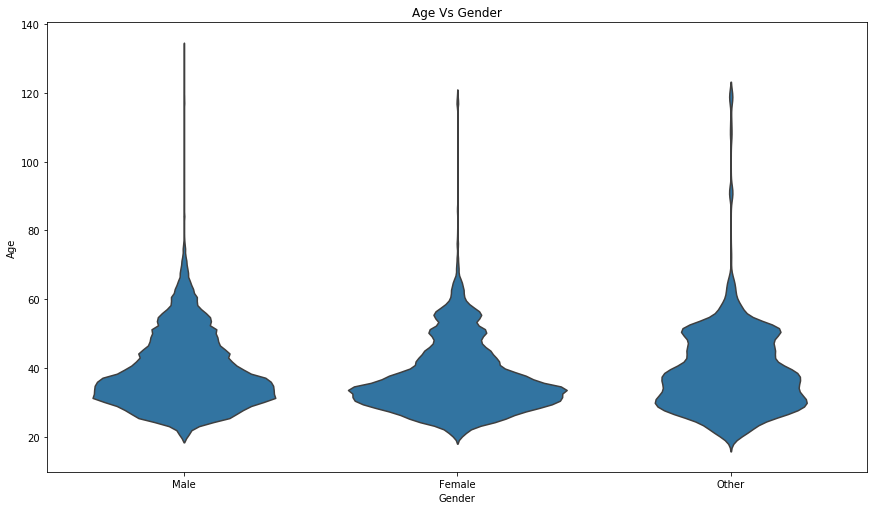

In [7]:
# violin plot for gender and age


plt.figure(figsize=[14.7,8.27])
base_color = sb.color_palette()[0] # main color
sb.violinplot(data = df, x = 'member_gender', y = 'age', color = base_color,
              inner = None);

plt.xlabel('Gender');
plt.ylabel('Age');
plt.title('Age Vs Gender');

> This violin plot shows that females has more cotribution to younger ages.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There is an inversely proportional relation between age and duration such that if age increase duration decreases. Also, it appears that male gender has more contribution to duration time.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Although males look very effictive on duration time, females also tend to be a contributer since they affect age which is highly related to duration time. 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

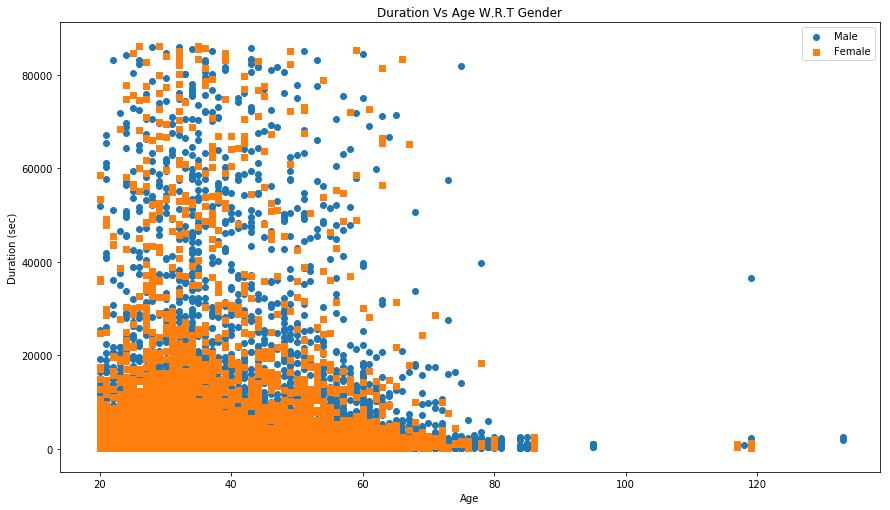

In [9]:
# sccatter plot of duration versus age

plt.figure(figsize=[14.7,8.27]);
markers = [['Male', 'o'],
               ['Female', 's']]

for cat, marker in markers:
    df1 = df[df['member_gender'] == cat]
    plt.scatter(data = df1, x = 'age', y = 'duration_sec', marker = marker);
plt.legend(['Male','Female']);

plt.xlabel('Age');
plt.ylabel('Duration (sec)');
plt.title('Duration Vs Age W.R.T Gender');

> From above figure, it looks like that women are pushing the time duration to increase while men are not.

In [11]:
# staions of intrest are with id : 30, 67, 15, 
df_temp = df[(df['start_station_id']==30)|(df['start_station_id']==67)|(df['start_station_id']==15)]
print(df_temp['start_station_name'].value_counts())
df_temp['start_station_id'].value_counts()# isolate staions from others

San Francisco Caltrain (Townsend St at 4th St)               11929
San Francisco Caltrain Station 2  (Townsend St at 4th St)    11627
San Francisco Ferry Building (Harry Bridges Plaza)           11507
Name: start_station_name, dtype: int64


30    11929
67    11627
15    11507
Name: start_station_id, dtype: int64

<Figure size 1058.4x595.44 with 0 Axes>

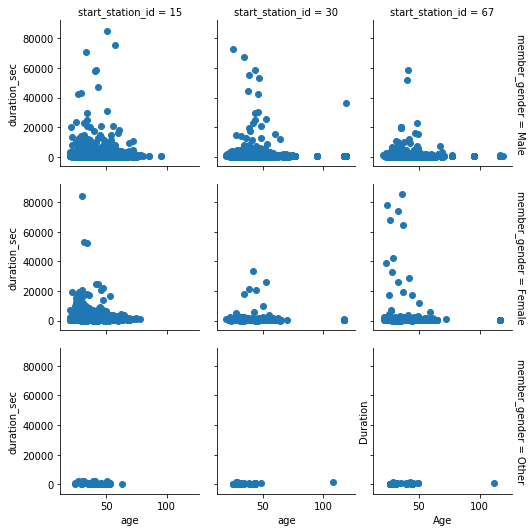

In [15]:
# now we plot Gender, Duration, And those staions together

plt.figure(figsize= [14.7,8.27]);
g = sb.FacetGrid(data = df_temp, col = 'start_station_id', row = 'member_gender', size = 2.5,
                margin_titles = True);
g.map(plt.scatter, 'age', 'duration_sec');
plt.xlabel('Age');
plt.ylabel('Duration');


> We can notice that more males are in staion 15. Also, duration tends to decres in staion 15 with age for both males and females. However, for the other two stations the duration is quite independent of age.

> Now, we will repeat the above step but for end staions

In [16]:
# staions of intrest are with id : 30, 67, 15, 
df_temp2 = df[(df['end_station_id']==30)|(df['end_station_id']==67)|(df['end_station_id']==15)]
print(df_temp2['end_station_name'].value_counts())
df_temp2['end_station_id'].value_counts()# isolate staions from others

San Francisco Caltrain (Townsend St at 4th St)               16698
San Francisco Ferry Building (Harry Bridges Plaza)           13579
San Francisco Caltrain Station 2  (Townsend St at 4th St)    13108
Name: end_station_name, dtype: int64


30    16698
15    13579
67    13108
Name: end_station_id, dtype: int64

Text(374.5583333333334, 0.5, 'Duration')

<Figure size 1058.4x595.44 with 0 Axes>

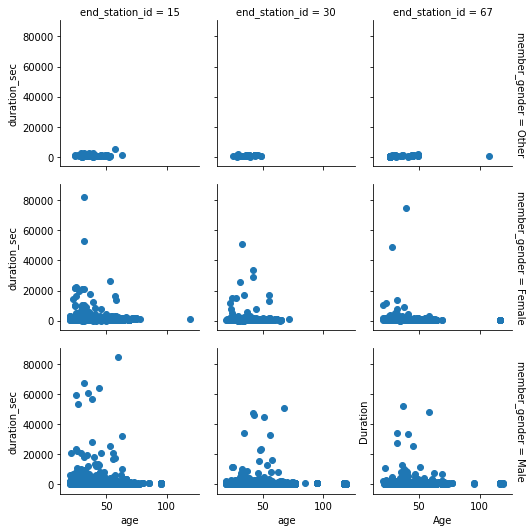

In [17]:
# now we plot Gender, Duration, And those staions together

plt.figure(figsize=[14.7,8.27])
g = sb.FacetGrid(data = df_temp2, col = 'end_station_id', row = 'member_gender', size = 2.5,
                margin_titles = True);
g.map(plt.scatter, 'age', 'duration_sec');

plt.xlabel('Age');
plt.ylabel('Duration')

> Suprisingly, it appears that duration is independent of age when end staions are 15, 30, 67!

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> One important finding is that duration is generally decreasing with age for men. On the other hand it looks independent of age for women. Another finding is that women tend to increase duration. 

### Were there any interesting or surprising interactions between features?

> For start stations 15, 30, and 67 there are much more men than women. However for the same stations at ending they appear to have similar proportions!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!